In [1]:
import pandas as pd
import numpy as np

# Matplotlib for visualization
from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns

from scipy import stats
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# A. Load Files

In [2]:
testData = pd.read_csv('test.csv')
trainData = pd.read_csv('train.csv')
originalTrainData = trainData.copy()

## Basic information

### Shapes

In [3]:
print(trainData.shape)
print("*"*50)
print(testData.shape)

(1460, 81)
**************************************************
(1459, 80)


### Dtypes

In [4]:
print(trainData.dtypes)
print("*"*50)
print(testData.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object
**************************************************
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object


### Display first 5 rows of trainData

In [5]:
trainData.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Display first 5 rows of testData

In [6]:
testData.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Summarize train attributes

In [7]:
trainData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Summarize test attributes

In [8]:
testData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


### Numeric & categorical attributes

In [9]:
numericalFeatures = trainData.dtypes[trainData.dtypes != "object"].index
print("Number of Numerical features: ", len(numericalFeatures))

categoricalFeatures = trainData.dtypes[trainData.dtypes == "object"].index
print("Number of Categorical features: ", len(categoricalFeatures))

Number of Numerical features:  38
Number of Categorical features:  43


### Display Numeric & categorical attributes

In [10]:
print(trainData[numericalFeatures].columns)
print("*"*100)
print(trainData[categoricalFeatures].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
****************************************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation

### Finding missing values ( 0 -> 1)

In [11]:
total = trainData.isnull().sum().sort_values(ascending=False)
percent = (trainData.isnull().sum()/trainData.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


### Find the correlation of the attributes with the Salesprice

In [12]:
# Find columns with strong correlation to target Sales Prices
corr = trainData.corr()
nr_num_cols = len(numericalFeatures)
ser_corr = corr.abs().nlargest(nr_num_cols, 'SalePrice')['SalePrice']
print("*"*30)
print(ser_corr)
print("*"*30)

******************************
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFin

### One dataframe for train and test

In [13]:
data = pd.concat([trainData, testData], ignore_index=True)
testData.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Drop Sales prices from the 'data' and 'train'

In [14]:
trainData.drop(['SalePrice'],axis=1,inplace=True)
data.drop(['SalePrice'],axis=1,inplace=True)
trainData.drop(['Id'],axis=1,inplace=True)
data.drop(['Id'],axis=1,inplace=True)

### Display Data shape

In [15]:
data.shape

(2919, 79)

# B. Preprocessing 

### Drop columns with the large missing values

In [16]:
# Delete some features with the many missing values
data.drop(['PoolQC','Alley','Fence','MiscFeature','FireplaceQu', 'Utilities'],axis=1,inplace=True)
testData.drop(['PoolQC','Alley','Fence','MiscFeature', 'FireplaceQu', 'Utilities'],axis=1,inplace=True)
trainData.drop(['PoolQC','Alley','Fence','MiscFeature', 'FireplaceQu', 'Utilities'],axis=1,inplace=True)

### Handing the missing values in the categorical attributes

In [17]:
from sklearn.preprocessing import LabelEncoder
# columns where NaN values have meaning e.g. no pool etc.
cols_fillna = ['MasVnrType','GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st','BsmtExposure','BsmtCond',
               'BsmtQual','BsmtFinType1','BsmtFinType2','MSZoning']

for col in cols_fillna:
    data[col].fillna('None',inplace=True)

### Convert the categorical attributes to numeric

In [18]:
# LabelEncode the Categorical Features¶
for col in data.columns:
      if(data[col].dtype == 'object'):
            le=LabelEncoder()
            data[col]=le.fit_transform(data[col])

### Handing the missing values in the numeric attributes

In [19]:
data.fillna(data.mean(), inplace=True)

### Final checks for missing values

In [20]:
data.isnull().sum().sum()

0

# C. Processing

## C.1 Classification A

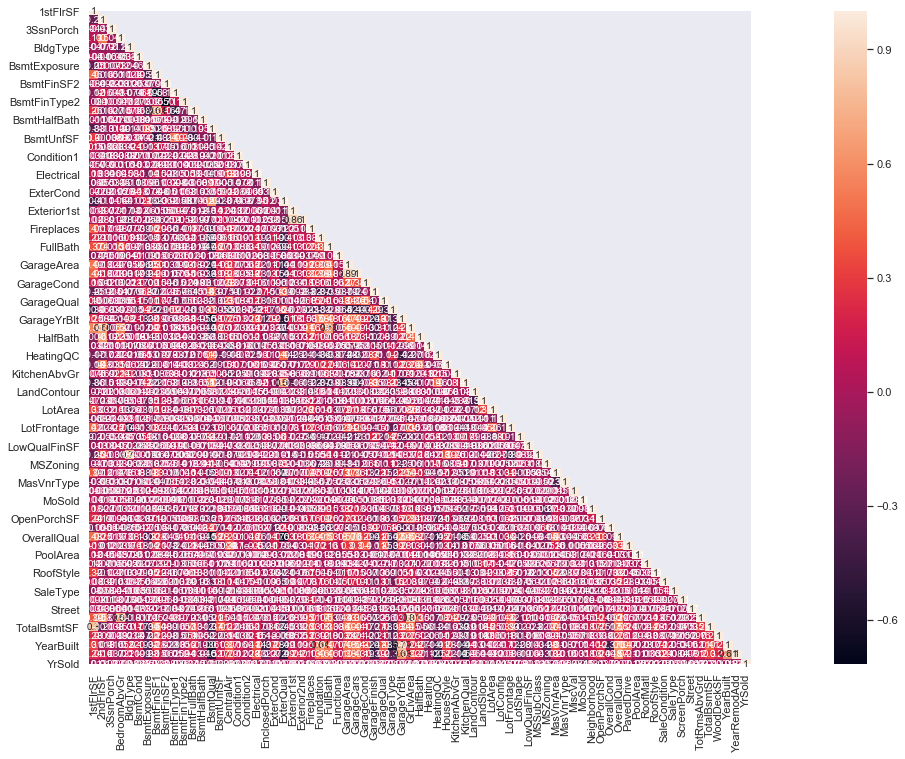

In [21]:
corr = data.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=corr,mask=mask,square=True,annot=True,cbar=True)

In [22]:
corrsum = corr.sum(axis = 0).sort_values(ascending=False)
print("*"*30)
print(corrsum)
print("*"*30)

******************************
GrLivArea       9.860200
OverallQual     8.785740
GarageCars      8.665099
GarageArea      8.450994
TotRmsAbvGrd    8.064377
                  ...   
HeatingQC      -3.610094
KitchenQual    -4.580004
ExterQual      -4.825797
BsmtQual       -4.891779
GarageType     -5.029635
Length: 73, dtype: float64
******************************


## C.2. Classification B

In [23]:
std = data.std(axis = 0).sort_values(ascending=False)
print("*"*30)
print(std)
print("*"*30)

******************************
LotArea         7886.996359
MiscVal          567.402211
GrLivArea        506.051045
BsmtFinSF1       455.532750
TotalBsmtSF      440.690726
                   ...     
Heating            0.245678
BsmtHalfBath       0.245603
KitchenAbvGr       0.214462
Condition2         0.209431
Street             0.063996
Length: 73, dtype: float64
******************************


## C.3 Normalization

In [24]:
# MinMaxScaler from Scikit-Learn
from sklearn.preprocessing import MinMaxScaler

# Initialize instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform item_data
data_scaled = scaler.fit_transform(data)

# Transform item_data
data_normalized = pd.DataFrame(data_scaled, index=data.index, columns=data.columns)

# Display first 10 rows of item_data_scaled
data_normalized.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,0.109641,0.413559,0.000000,0.375,0.00,1.00,0.75,0.125089,0.00000,0.333333,...,0.8,1.0,0.0,1.0,0.461538,0.140098,0.000000,0.949275,0.883333,0.50
1,0.194917,0.000000,0.000000,0.375,0.00,1.00,0.25,0.173281,0.00000,0.000000,...,0.8,1.0,0.0,1.0,0.307692,0.206547,0.209270,0.753623,0.433333,0.25
2,0.123083,0.419370,0.000000,0.375,0.00,1.00,0.50,0.086109,0.00000,0.333333,...,0.8,1.0,0.0,1.0,0.307692,0.150573,0.000000,0.934783,0.866667,0.50
3,0.131695,0.366102,0.000000,0.375,0.00,0.25,0.75,0.038271,0.00000,0.000000,...,0.0,1.0,0.0,1.0,0.384615,0.123732,0.000000,0.311594,0.333333,0.00
4,0.170342,0.509927,0.000000,0.500,0.00,1.00,0.00,0.116052,0.00000,0.333333,...,0.8,1.0,0.0,1.0,0.538462,0.187398,0.134831,0.927536,0.833333,0.50
5,0.097038,0.274092,0.629921,0.125,0.00,1.00,0.75,0.129695,0.00000,0.333333,...,0.8,1.0,0.0,1.0,0.230769,0.130278,0.028090,0.876812,0.750000,0.75
6,0.285654,0.000000,0.000000,0.375,0.00,1.00,0.00,0.242558,0.00000,0.333333,...,0.8,1.0,0.0,1.0,0.384615,0.275941,0.179073,0.956522,0.916667,0.25
7,0.162361,0.476029,0.000000,0.375,0.00,1.00,0.50,0.152197,0.02097,0.000000,...,0.8,1.0,0.0,1.0,0.384615,0.181178,0.165028,0.731884,0.383333,0.75
8,0.144507,0.364165,0.000000,0.250,0.00,1.00,0.75,0.000000,0.00000,1.000000,...,0.0,1.0,0.0,1.0,0.461538,0.155810,0.063202,0.427536,0.000000,0.50
9,0.156060,0.000000,0.000000,0.250,0.25,1.00,0.75,0.150780,0.00000,0.333333,...,0.8,1.0,0.0,1.0,0.230769,0.162193,0.000000,0.485507,0.000000,0.50


## C.4. Classification C

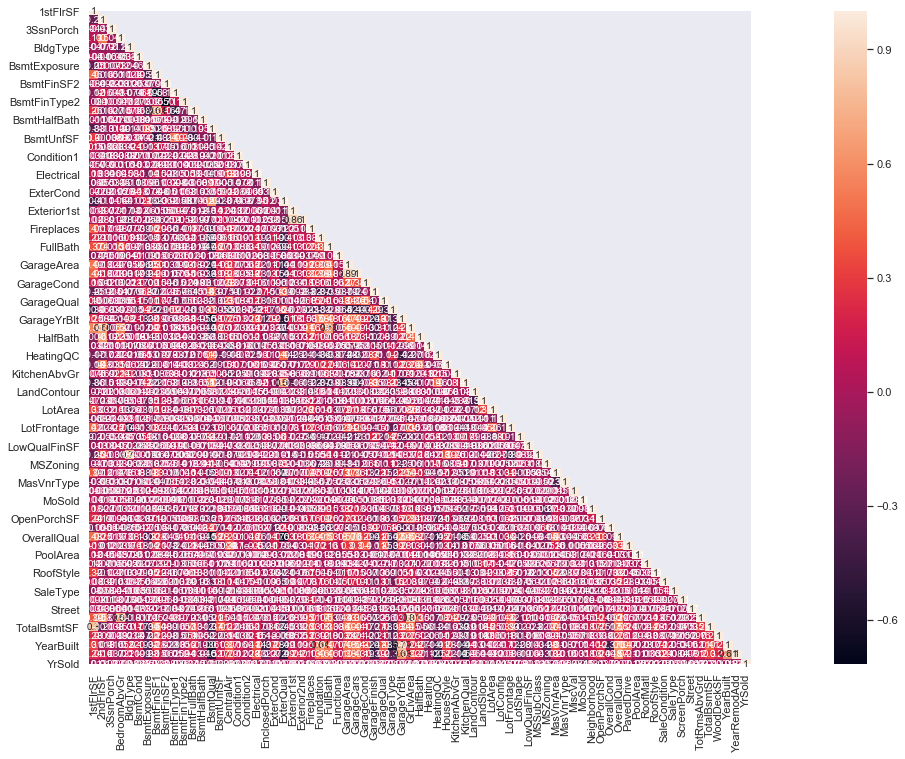

In [25]:
corrnormal = data_normalized.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=corr,mask=mask,square=True,annot=True,cbar=True)

In [26]:
normalCorr = data_normalized.sum(axis = 0).sort_values(ascending=False)
print("*"*30)
print(normalCorr)
print("*"*30)

******************************
Street           2907.000000
Functional       2790.000000
GarageCond       2781.400000
GarageQual       2737.800000
CentralAir       2723.000000
                    ...     
EnclosedPorch      66.624506
3SsnPorch          14.952756
LowQualFinSF       12.878759
MiscVal             8.727118
PoolArea            8.216250
Length: 73, dtype: float64
******************************


## C.4. Classification D

In [27]:
normalizedStd = data_normalized.std(axis = 0).sort_values(ascending=False)
print("*"*30)
print(normalizedStd)
print("*"*30)

******************************
LotShape        0.469907
HeatingQC       0.435637
LotConfig       0.401118
GarageFinish    0.400805
BsmtFinType1    0.372529
                  ...   
PoolArea        0.044580
LowQualFinSF    0.043606
LotArea         0.036865
MiscVal         0.033377
Condition2      0.029919
Length: 73, dtype: float64
******************************


## C.6. PCA (Principal Component Analysis)

### PCA Analysis for the original dataset -> data pandas

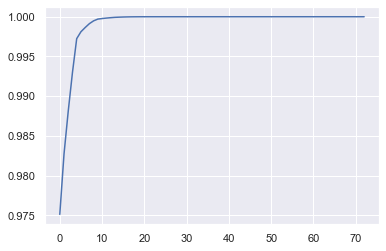

In [28]:
# Initialize instance of PCA transformation
from sklearn.decomposition import PCA
pca = PCA()

# Fit the instance
pca.fit(data)

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
# Plot cumulative explained variance
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)

In [29]:
# Initialize PCA transformation, only keeping 20 components
pca = PCA(n_components=20)

# Fit and transform data
PC_items = pca.fit_transform(data)

# Display shape of PC_items
PC_items.shape
n_pcs = pca.components_.shape[0]

In [30]:
# Put pcaData into a dataframe
pcaData = pd.DataFrame(PC_items)

# Name the columns
pcaData.columns = ['PC{}'.format(i + 1) for i in range(PC_items.shape[1])]

# Update its index
pcaData.index = data_normalized.index

# Display first 5 rows
pcaData.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-1717.730626,-16.307858,-216.957284,232.159517,-744.559883,-181.073394,-7.068489,83.487921,41.742226,-114.035551,-24.118981,-11.550666,-30.463073,9.850197,-17.952384,3.445488,34.064420,-4.103189,-5.769359,0.192548
1,-562.552621,105.238502,646.424876,-321.991032,-234.337628,-104.043414,28.862527,-56.681495,-110.976747,201.480563,18.686387,-26.343314,-3.775403,-1.438313,-34.661844,-3.942047,-5.695056,-5.838809,7.475895,-6.929996
2,1082.325749,-0.945921,-433.688856,239.060640,-433.371287,-171.944678,-17.241725,112.465387,-4.795985,-114.121265,-12.221622,-33.611161,-30.415009,8.204084,-12.201257,3.839888,28.305458,-3.879785,-4.926003,0.125701
3,-623.094461,-142.351922,-519.378690,261.293125,-197.615982,8.191816,40.459781,119.585190,-157.925187,-120.092260,210.662953,106.379939,10.670134,-50.615041,20.503251,-21.132973,10.874086,1.363927,-11.667332,0.316724
4,4110.029130,501.603951,-601.736592,234.061261,-588.157764,-161.657861,-39.592150,276.191249,49.538053,25.143998,-4.528224,3.073596,-17.774907,7.379471,-17.179458,-2.636775,0.137040,-3.564921,2.891592,-1.198938


### PCA Analysis for the normalized dataset -> data_normalized pandas

In [31]:
pca = PCA()
# Fit the instance
pca.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

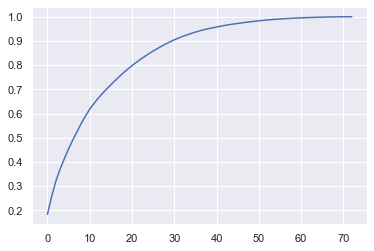

In [32]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
# Plot cumulative explained variance
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)

### PCA ANALYSIS - FIND THE COMPONENTS

In [33]:
# How much variance we'd capture with the first 20 components
cumulative_explained_variance[20]

0.7974870984385024

In [34]:
# Initialize PCA transformation, only keeping 20 components
pca = PCA(n_components=20)

# Fit and transform item_data_scaled
PC_items = pca.fit_transform(data_scaled)

# Display shape of PC_items
PC_items.shape
n_pcs = pca.components_.shape[0]

In [35]:
# Put PC_items into a dataframe
items_pca = pd.DataFrame(PC_items)

# Name the columns
items_pca.columns = ['PC{}'.format(i + 1) for i in range(PC_items.shape[1])]

# Update its index
items_pca.index = data_normalized.index

# Display first 5 rows
items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,0.565067,-0.416871,-0.363311,-0.181690,0.064049,-0.435319,0.252518,-0.350099,-0.104237,0.093610,-0.039629,-0.023558,0.209363,0.065152,0.103069,-0.384753,-0.255959,-0.134312,-0.099051,0.013850
1,0.072104,0.231474,-0.342849,-0.527288,0.485269,0.037305,-0.046131,0.163089,-0.273563,-0.021214,0.342971,0.159031,-0.034048,0.093764,-0.369666,-0.185107,0.305088,-0.018099,0.098621,-0.313834
2,0.889303,0.205584,0.048665,0.002728,-0.432958,-0.321521,0.403223,-0.125384,-0.163577,0.131561,-0.076653,0.045429,0.105762,-0.058037,-0.008306,0.202629,-0.372006,-0.072545,-0.108783,-0.040520
3,-0.273720,0.784929,0.634119,0.068478,0.334905,-0.092963,0.612270,0.082556,-0.682565,0.241902,-0.250059,-0.272126,0.170786,0.122704,0.221033,-0.225312,0.050723,-0.442501,-0.312220,0.479516
4,1.095039,0.399935,0.236565,0.055938,0.009716,-0.337196,0.245861,-0.008017,-0.271479,0.382890,-0.210448,0.283223,0.051303,-0.116773,-0.252472,0.463463,-0.106943,0.042864,-0.147945,-0.096137


# D. Analysis

### Create function to calculate the elbow

In [36]:
from sklearn.cluster import KMeans
def elbow(data,max_clusters=15):
    inertias = []
    for k in range(2, max_clusters):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    fig = plt.figure(figsize=(20, 10))
    plt.plot(range(2, max_clusters), inertias, 'bx-')
    plt.grid()
    plt.title('ELBOW')

### Draw the elbow for the pca original data

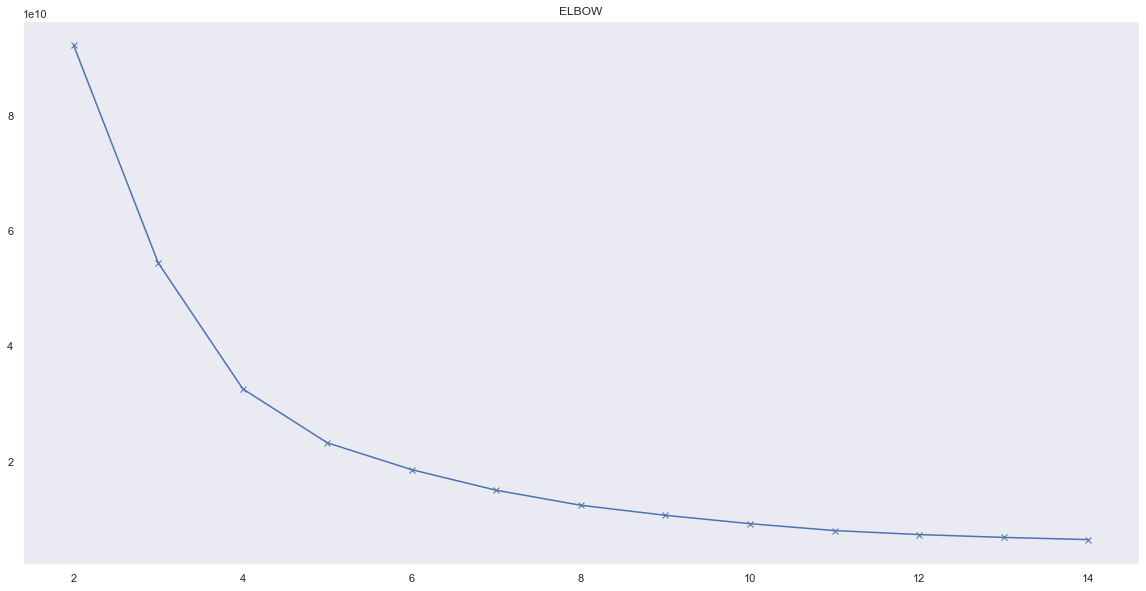

In [37]:
elbow(pcaData)

### Draw the elbow for the pca normalized data

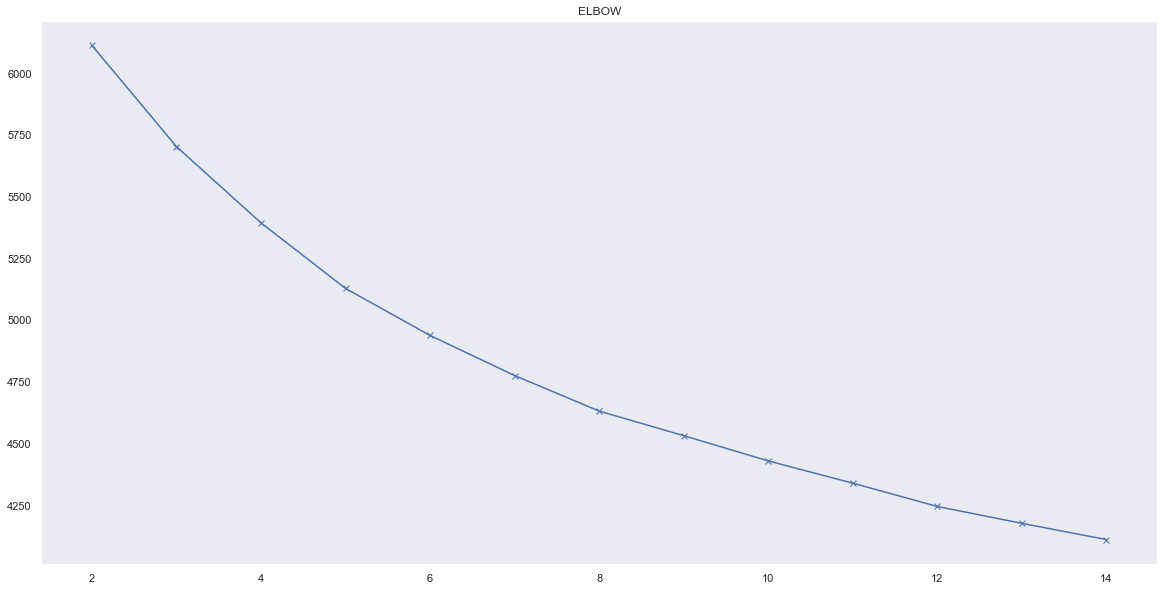

In [38]:
elbow(items_pca)

### Clustering & Prediction

In [39]:
def kmeans_clustering(data,n_clusters):
    matrix=data.values
    kmeans = KMeans(n_clusters,random_state=3)
    kmeans.fit(matrix)
    labels=kmeans.labels_
    output = pd.DataFrame(data=labels, columns=['cluster'], index=data.index)
    return output

In [40]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.ensemble import GradientBoostingRegressor

def final_data_set(dataframe,n_clusters):
    print('Clustering using K-means, k =',n_clusters)
    print('*'*100)
    clusteredByKmeans = kmeans_clustering(dataframe,n_clusters=n_clusters)
    reportedData = dataframe.copy()
    reportedData['Cluster'] = clusteredByKmeans['cluster']
    reportedData['SalePrice'] = originalTrainData['SalePrice'][originalTrainData['SalePrice'].notnull()]
    dataframe = reportedData.copy()
    return dataframe

In [41]:
def clustering_and_boosting_regression(dataframe):
        cluster = dataframe.iloc[:,-2].copy()
        n_clusters = len(cluster.unique())
        clusters = []
        predicted_values = [] 
        
        for cluster_index in range(n_clusters):
            cluster_i = dataframe[dataframe.Cluster == cluster_index]
            clusters.append(cluster_i)
        for cluster in clusters:
            x  = cluster[cluster.iloc[:,-1].notnull()].copy()
            y = x.iloc[:,-1]
            x.drop(x.columns[-1], inplace = True,axis=1)
            x.drop(x.columns[-1], inplace = True,axis=1)
            x_pred=cluster[cluster.iloc[:,-1].isnull()].copy()
            x_pred.drop(x_pred.columns[-1], inplace = True,axis=1)
            x_pred.drop(x_pred.columns[-1], inplace = True,axis=1)
            print('Shapes of x and y :',x.shape,y.shape,'Shape of values to be predicted :',x_pred.shape)
            print('Fitting model on data')
            params = {'n_estimators': 400, 'max_depth': 8, 'min_samples_split': 2,
              'learning_rate': 0.05, 'loss': 'ls'}
            print('x_predictions is: ', x_pred.head())
            clf = GradientBoostingRegressor(**params)
            X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=7)
            clf.fit(X_train, y_train)
            y_pred=clf.predict(X_test)
            mean_error=np.mean((y_pred - y_test)**2)
            print('Mean Squared Error: ',mean_error)
            print('R^2 Score: ',clf.score(X_train, y_train))
            plt.figure(figsize=(15,10))
            plt.scatter(y_test,y_pred)
            plt.xlabel('True Price')
            plt.ylabel('Predicted Price')
            plt.grid()
            plt.show()
            if (x_pred.empty == False):
                predictions=clf.predict(x_pred)
                preds=list(zip(cluster[cluster.iloc[:,-1].isnull()].index,predictions))
                print('')
                print("*"*100)
                print('')
                predicted_values.append(preds)
            

        return predicted_values 

In [42]:
def create_file(data, name_file):
    results = pd.DataFrame(columns = ['Id', 'SalePrice'])
    res_dict={}
    for item in data:
        temp_dict = dict(item)
        res_dict.update(temp_dict)
    results = pd.DataFrame.from_dict(res_dict, orient='index', columns = ['SalePrice'])
    results['Id'] = results.index + 1
    results = results[['Id', 'SalePrice']]
    results.sort_values('Id', inplace = True)
    print('RESULTS - SHAPE -> ',results.shape)
    results.to_csv(name_file,index=False)

Clustering using K-means, k = 3
****************************************************************************************************
Shapes of x and y : (314, 20) (314,) Shape of values to be predicted : (326, 20)
Fitting model on data
x_predictions is:             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
1491 -1.414534 -0.064332  0.854476 -0.040164  0.675789  0.233011 -0.014138   
1522 -1.159400 -0.070903  0.007882 -0.173449 -0.184396 -0.101771 -0.382028   
1526 -0.898823 -0.189205  0.614287 -0.095903  0.720325 -0.029078  0.226362   
1531 -1.071344 -0.018078 -0.160830 -0.158761  0.029245  0.580968  0.286814   
1533 -0.528539 -0.525981  0.758052  0.007070  0.783349  0.358854  0.208289   

           PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
1491 -0.121832  0.508952  0.089526 -0.423285  0.054885  0.654891 -0.148206   
1522 -0.049739  0.829205 -0.133853 -0.004580  0.217584  0.619505 -0.078825   
1526  0.097386  0.574356 -0.136400 -0.0299

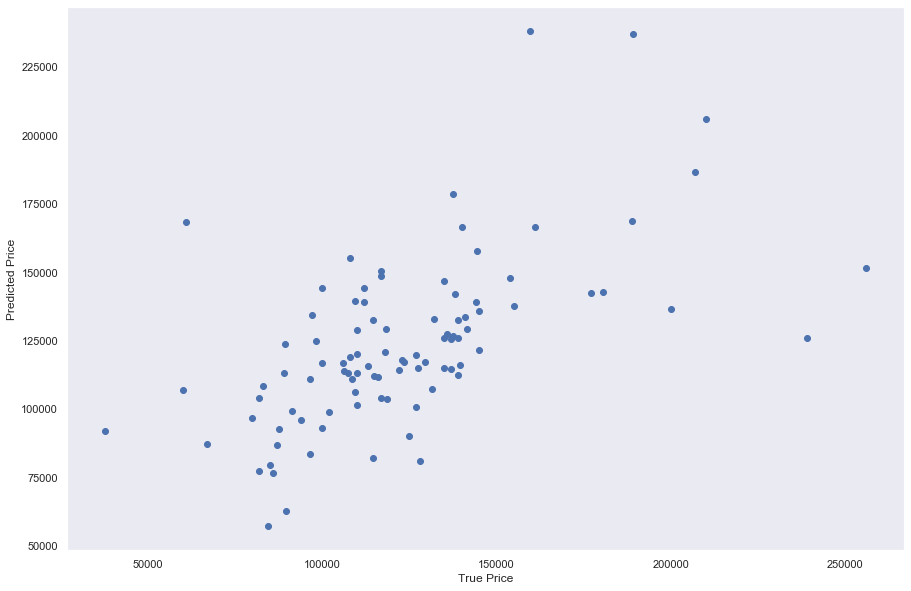


****************************************************************************************************

Shapes of x and y : (545, 20) (545,) Shape of values to be predicted : (552, 20)
Fitting model on data
x_predictions is:             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
1460 -0.884926  0.075980 -0.177032 -0.460676 -0.137344 -0.275696 -0.210875   
1461 -0.292816  1.166689  0.382379 -0.276526  0.356825 -0.171221  0.255243   
1468  0.025008  0.042923 -0.562821 -0.391134  0.088864 -0.065628 -0.019386   
1469 -0.411054  0.717811 -0.248151 -0.282983  0.910638  0.262105 -0.232494   
1471 -0.904526 -0.145958 -0.622545  0.898431 -0.013854 -0.410363  0.155884   

           PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
1460 -0.174519  0.631434 -0.129755 -0.416480 -0.027900  0.090132  0.242669   
1461 -0.203445  0.393731  0.121496 -0.354002 -0.294288  0.276471 -0.379920   
1468 -0.057500  0.583658  0.295177  0.002508  0.426888 -0.063368  0.0316

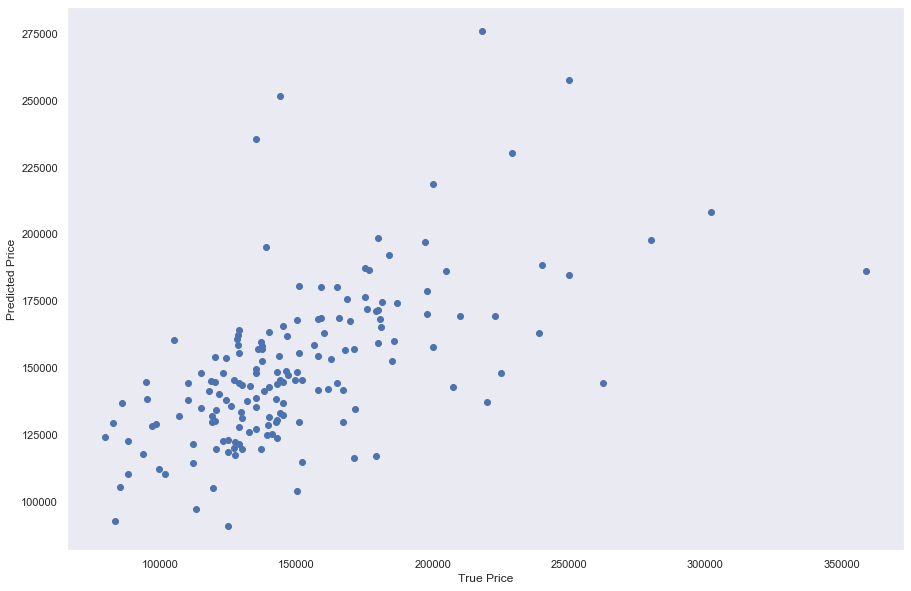


****************************************************************************************************

Shapes of x and y : (601, 20) (601,) Shape of values to be predicted : (581, 20)
Fitting model on data
x_predictions is:             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
1462  0.575969  0.442314 -0.003499  0.253425 -0.392976 -0.162529  0.263746   
1463  0.776624  0.238290  0.086610  0.072020 -0.379778 -0.243832  0.485097   
1464  0.650113  0.314913 -0.492472  0.335777 -0.199957  0.455464  0.647386   
1465  0.500333  0.558830  0.657468  0.692388  0.322724 -0.346148 -0.206729   
1466  0.628353  0.563870 -0.213114 -0.246513 -0.234583  0.382469  0.446220   

           PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
1462 -0.843453  0.403891 -0.378975 -0.157660 -0.186654  0.104414  0.104597   
1463 -0.745984  0.262824 -0.362125  0.187208 -0.111726  0.103695 -0.105582   
1464  0.648246  0.824745 -0.073185  0.285317 -0.126027  0.342913 -0.1068

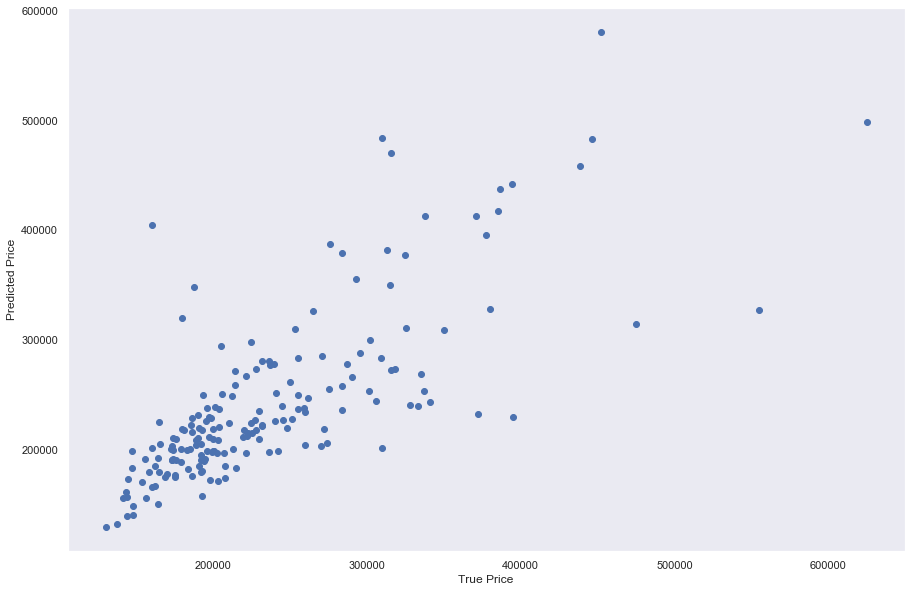


****************************************************************************************************



In [43]:
items_pca = final_data_set(items_pca,3)
prediction_from_pca = clustering_and_boosting_regression(items_pca)

In [44]:
create_file(prediction_from_pca, 'predictions_from_pca.csv')

RESULTS - SHAPE ->  (1459, 2)


### Clustering & Prediction for Clarification A (Original Data)

In [45]:
print(corrsum[:20])

GrLivArea       9.860200
OverallQual     8.785740
GarageCars      8.665099
GarageArea      8.450994
TotRmsAbvGrd    8.064377
FullBath        7.802445
TotalBsmtSF     7.214917
1stFlrSF        7.101370
YearBuilt       6.791658
YearRemodAdd    6.359949
GarageYrBlt     6.320468
Fireplaces      6.037972
MasVnrArea      5.737295
PavedDrive      5.252051
GarageCond      5.106664
CentralAir      5.104080
HalfBath        5.098399
2ndFlrSF        5.084856
GarageQual      5.054574
Foundation      4.989545
dtype: float64


Clustering using K-means, k = 4
****************************************************************************************************
Shapes of x and y : (529, 19) (529,) Shape of values to be predicted : (520, 19)
Fitting model on data
x_predictions is:        GrLivArea  OverallQual  GarageCars  GarageArea  TotRmsAbvGrd  FullBath  \
1460        896            5         1.0       730.0             5         1   
1461       1329            6         1.0       312.0             6         1   
1464       1280            8         2.0       506.0             5         2   
1466       1187            6         2.0       420.0             6         2   
1469        882            4         2.0       525.0             4         1   

      TotalBsmtSF  1stFlrSF  YearBuilt  YearRemodAdd  GarageYrBlt  Fireplaces  \
1460        882.0       896       1961          1961       1961.0           0   
1461       1329.0      1329       1958          1958       1958.0           0   
1464       1280.0    

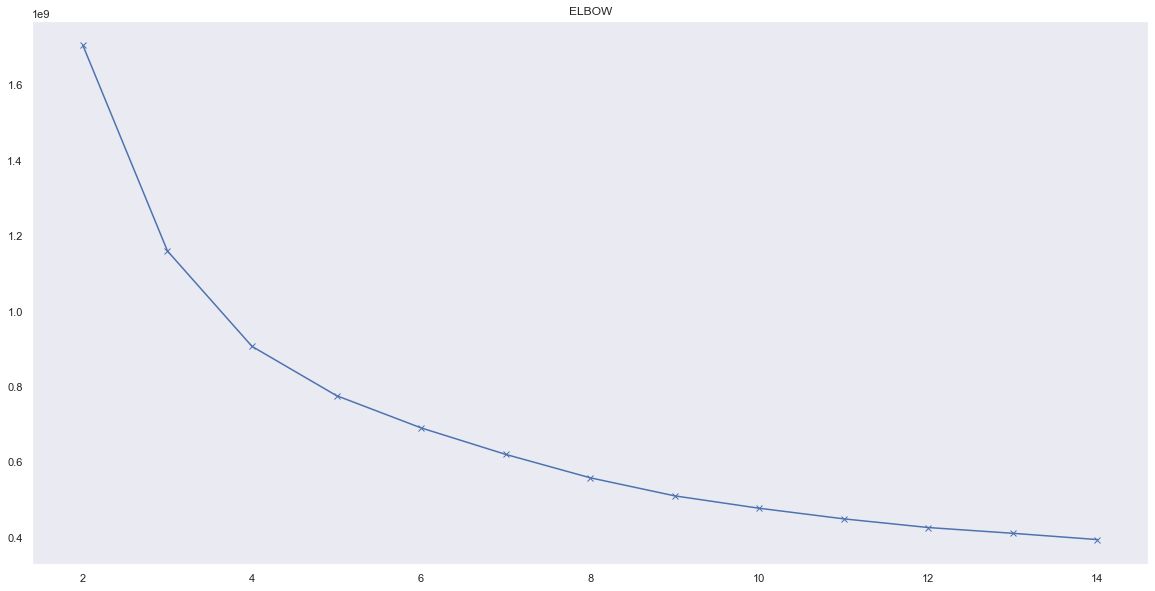

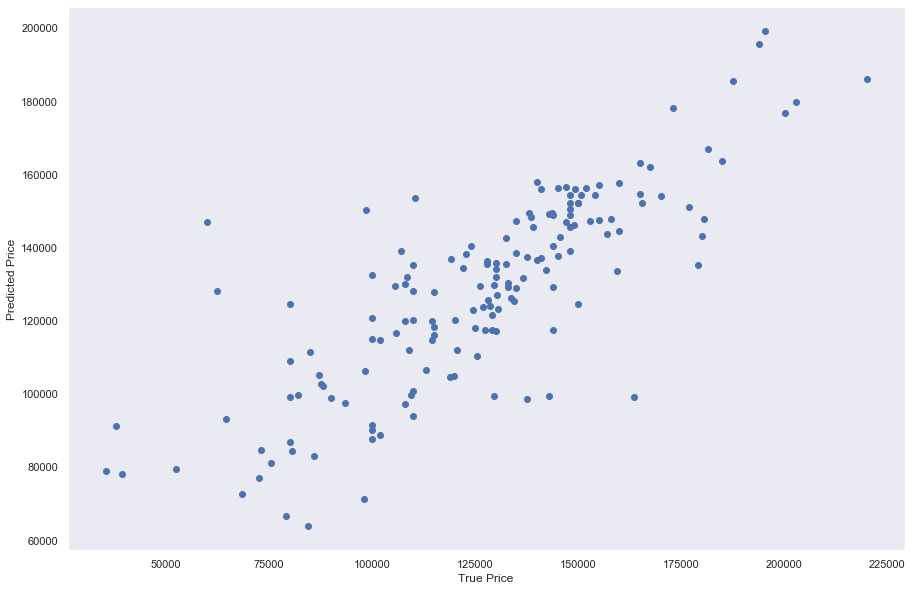


****************************************************************************************************

Shapes of x and y : (179, 19) (179,) Shape of values to be predicted : (141, 19)
Fitting model on data
x_predictions is:        GrLivArea  OverallQual  GarageCars  GarageArea  TotRmsAbvGrd  FullBath  \
1475       2334            9         3.0       751.0            10         2   
1480       2250            8         3.0       756.0             7         2   
1486       2475            8         3.0       962.0             7         2   
1493       2349            8         3.0       762.0             9         2   
1494       2225            8         3.0       713.0             7         2   

      TotalBsmtSF  1stFlrSF  YearBuilt  YearRemodAdd  GarageYrBlt  Fireplaces  \
1475       1590.0      1627       2009          2010       2009.0           1   
1480       1671.0      1687       2002          2002       2002.0           1   
1486       1629.0      1645       1998          199

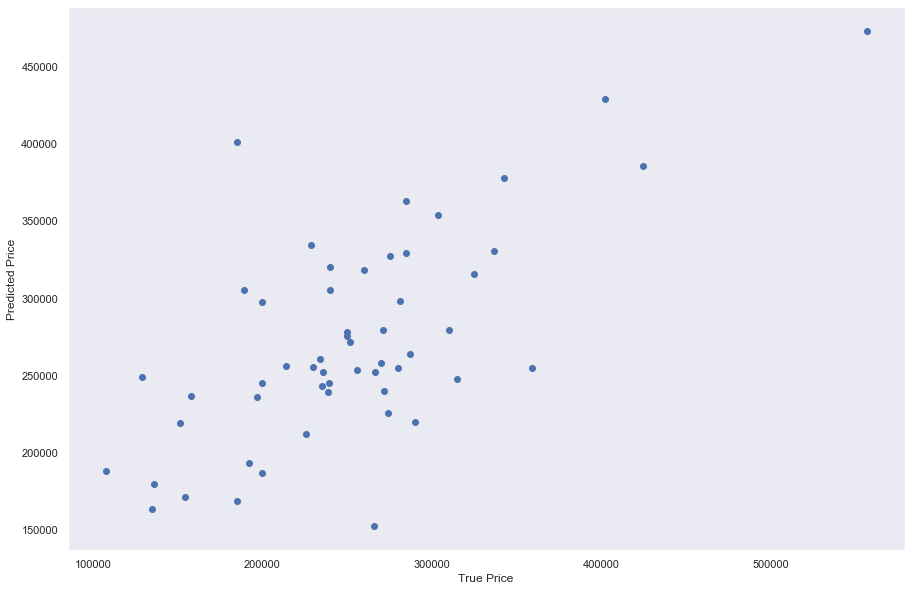


****************************************************************************************************

Shapes of x and y : (329, 19) (329,) Shape of values to be predicted : (358, 19)
Fitting model on data
x_predictions is:        GrLivArea  OverallQual  GarageCars  GarageArea  TotRmsAbvGrd  FullBath  \
1468       1341            7         2.0       506.0             5         1   
1470       1337            7         2.0       511.0             5         2   
1476       1544            8         3.0       868.0             7         2   
1477       1698            9         3.0       730.0             7         2   
1478       1822            8         3.0       678.0             8         2   

      TotalBsmtSF  1stFlrSF  YearBuilt  YearRemodAdd  GarageYrBlt  Fireplaces  \
1468       1300.0      1341       1990          1990       1990.0           1   
1470       1405.0      1337       1999          1999       1999.0           1   
1476       1544.0      1544       2009          201

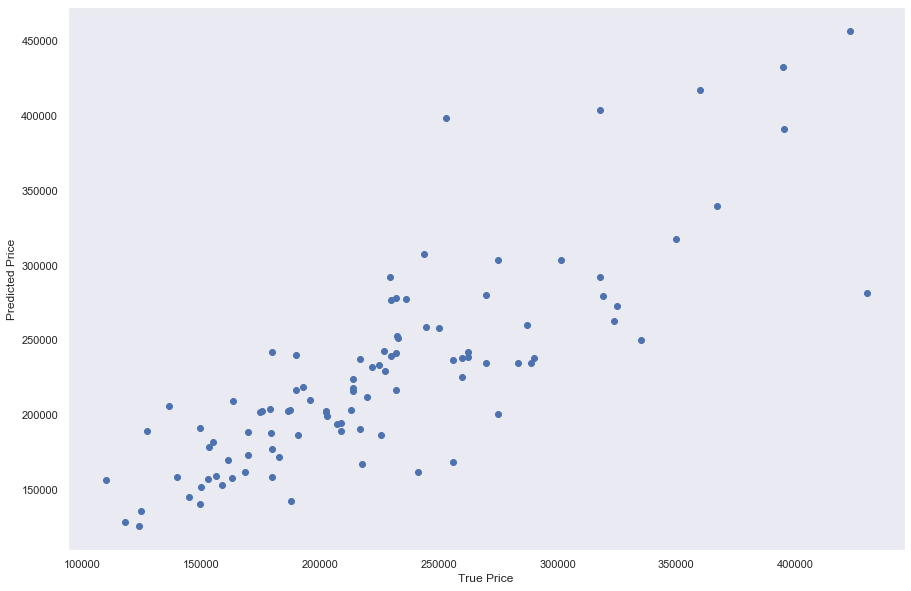


****************************************************************************************************

Shapes of x and y : (423, 19) (423,) Shape of values to be predicted : (440, 19)
Fitting model on data
x_predictions is:        GrLivArea  OverallQual  GarageCars  GarageArea  TotRmsAbvGrd  FullBath  \
1462       1629            5         2.0       482.0             6         2   
1463       1604            6         2.0       470.0             7         2   
1465       1655            6         2.0       440.0             7         2   
1467       1465            6         2.0       393.0             7         2   
1471        987            6         1.0       264.0             5         1   

      TotalBsmtSF  1stFlrSF  YearBuilt  YearRemodAdd  GarageYrBlt  Fireplaces  \
1462        928.0       928       1997          1998       1997.0           1   
1463        926.0       926       1998          1998       1998.0           1   
1465        763.0       763       1993          199

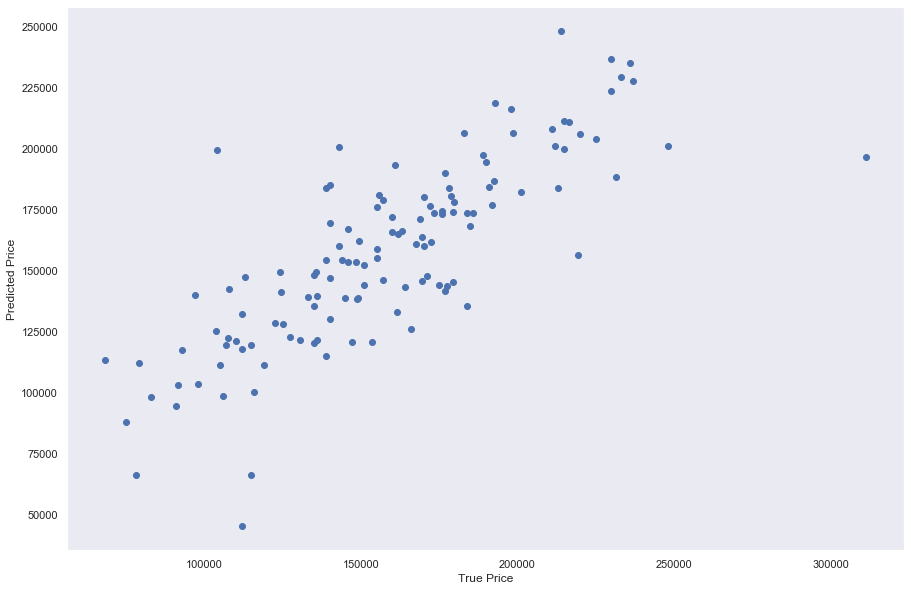


****************************************************************************************************

RESULTS - SHAPE ->  (1459, 2)


In [46]:
dataFromCorr = data.copy()
dataFromCorr = dataFromCorr[[
                            'GrLivArea',
                            'OverallQual',
                            'GarageCars',
                            'GarageArea', 
                            'TotRmsAbvGrd',
                            'FullBath',
                            'TotalBsmtSF',
                            '1stFlrSF',
                            'YearBuilt',
                            'YearRemodAdd',
                            'GarageYrBlt',
                            'Fireplaces',
                            'MasVnrArea',
                            'PavedDrive',
                            'GarageCond',
                            'CentralAir',
                            'HalfBath',
                            '2ndFlrSF',
                            'GarageQual']]
elbow(dataFromCorr)
dataFromCorr = final_data_set(dataFromCorr,4)
predictionForDataCorr = clustering_and_boosting_regression(dataFromCorr)
answers = create_file(predictionForDataCorr,'predictions_from_corr_original_data.csv')

### Clustering & Prediction for Clarification B (Original Data)

In [47]:
print(std[:20])

LotArea          7886.996359
MiscVal           567.402211
GrLivArea         506.051045
BsmtFinSF1        455.532750
TotalBsmtSF       440.690726
BsmtUnfSF         439.468337
2ndFlrSF          428.701456
1stFlrSF          392.362079
GarageArea        215.357904
MasVnrArea        178.626089
BsmtFinSF2        169.176615
WoodDeckSF        126.526589
OpenPorchSF        67.575493
EnclosedPorch      64.244246
ScreenPorch        56.184365
LowQualFinSF       46.396825
MSSubClass         42.517628
PoolArea           35.663946
YearBuilt          30.291442
3SsnPorch          25.188169
dtype: float64


Clustering using K-means, k = 4
****************************************************************************************************
Shapes of x and y : (925, 20) (925,) Shape of values to be predicted : (937, 20)
Fitting model on data
x_predictions is:        LotArea  MiscVal  GrLivArea  BsmtFinSF1  TotalBsmtSF  BsmtUnfSF  \
1463     9978        0       1604       602.0        926.0      324.0   
1464     5005        0       1280       263.0       1280.0     1017.0   
1465    10000        0       1655         0.0        763.0      763.0   
1466     7980      500       1187       935.0       1168.0      233.0   
1467     8402        0       1465         0.0        789.0      789.0   

      2ndFlrSF  1stFlrSF  GarageArea  MasVnrArea  BsmtFinSF2  WoodDeckSF  \
1463       678       926       470.0        20.0         0.0         360   
1464         0      1280       506.0         0.0         0.0           0   
1465       892       763       440.0         0.0         0.0         157   
14

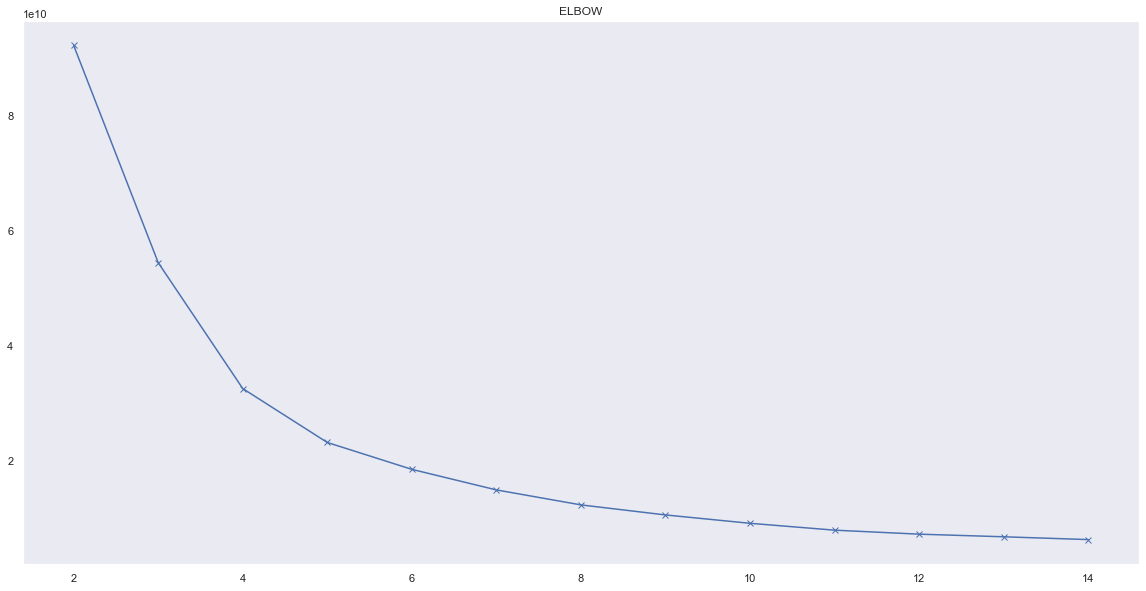

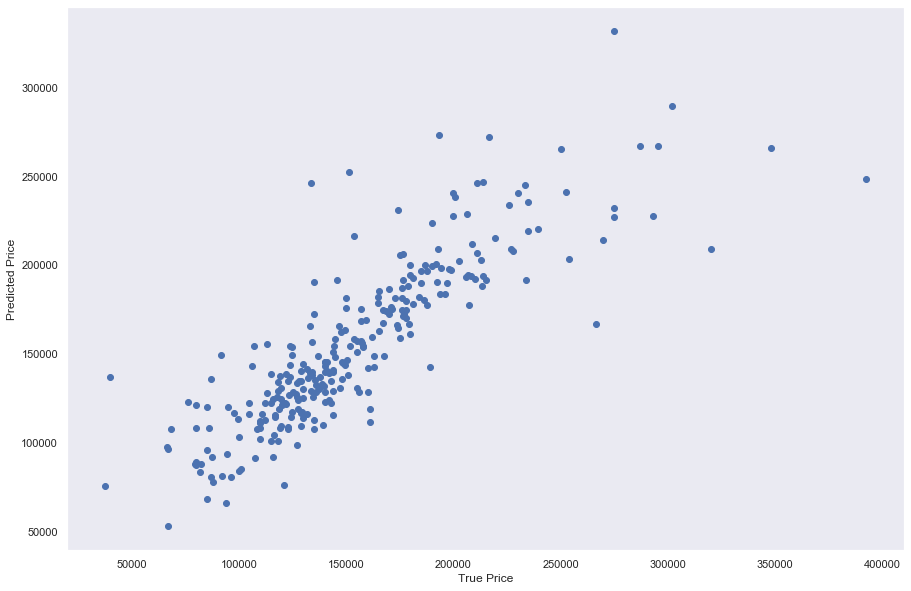


****************************************************************************************************

Shapes of x and y : (4, 20) (4,) Shape of values to be predicted : (0, 20)
Fitting model on data
x_predictions is:  Empty DataFrame
Columns: [LotArea, MiscVal, GrLivArea, BsmtFinSF1, TotalBsmtSF, BsmtUnfSF, 2ndFlrSF, 1stFlrSF, GarageArea, MasVnrArea, BsmtFinSF2, WoodDeckSF, OpenPorchSF, EnclosedPorch, ScreenPorch, LowQualFinSF, MSSubClass, PoolArea, YearBuilt, 3SsnPorch]
Index: []
Mean Squared Error:  4977836831.931576
R^2 Score:  0.9999999999999994


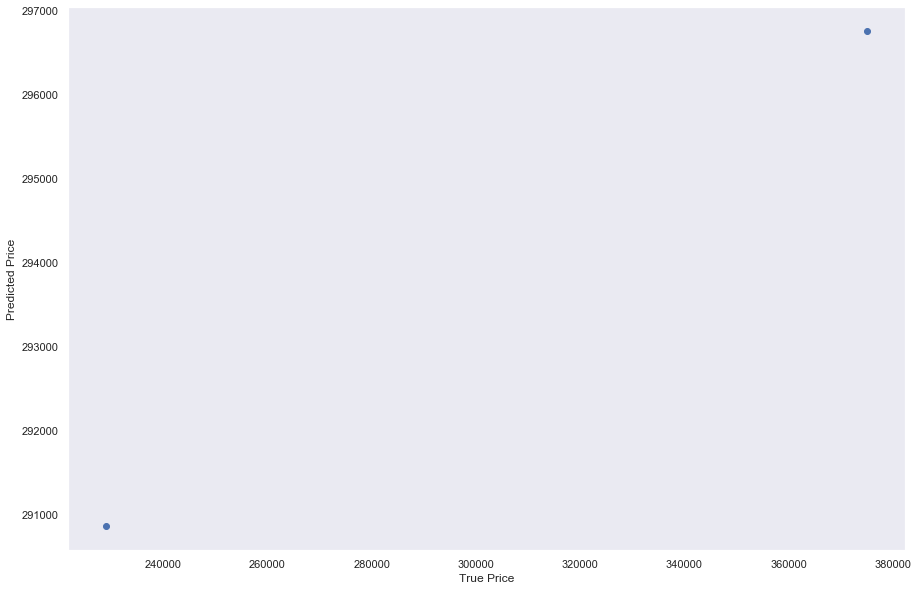

Shapes of x and y : (20, 20) (20,) Shape of values to be predicted : (13, 20)
Fitting model on data
x_predictions is:        LotArea  MiscVal  GrLivArea  BsmtFinSF1  TotalBsmtSF  BsmtUnfSF  \
1945    31220      750       1474         0.0       1632.0     1632.0   
1947    47280        0       1488         0.0       1488.0     1488.0   
2188    47007        0       3820         0.0          0.0        0.0   
2250    56600        0       1836         0.0        686.0      686.0   
2263    51974        0       2338      1101.0       2660.0     1559.0   

      2ndFlrSF  1stFlrSF  GarageArea  MasVnrArea  BsmtFinSF2  WoodDeckSF  \
1945         0      1474       495.0         0.0         0.0           0   
1947         0      1488       738.0        44.0         0.0           0   
2188         0      3820       624.0         0.0         0.0           0   
2250       686      1150       288.0         0.0         0.0           0   
2263         0      2338      1110.0       710.0         0.0  

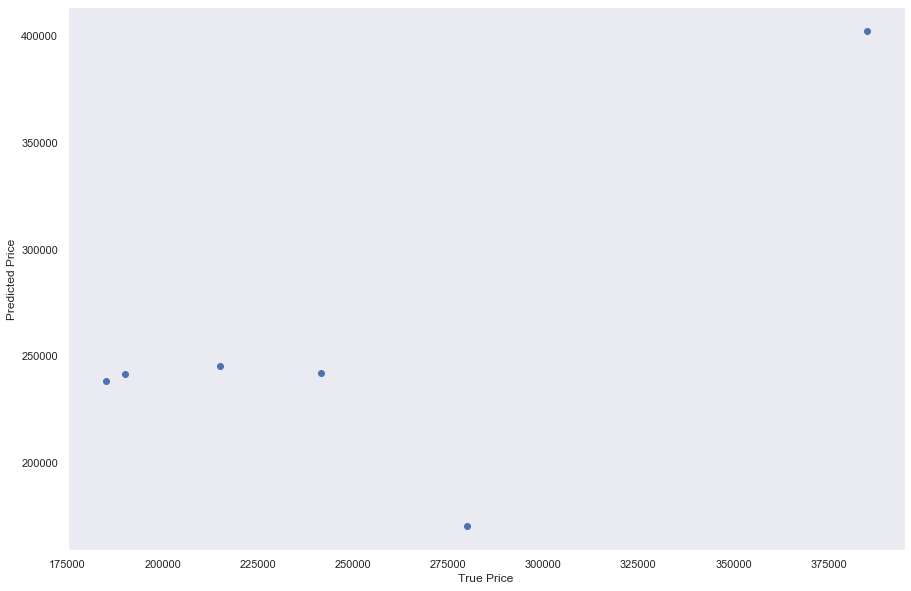


****************************************************************************************************

Shapes of x and y : (511, 20) (511,) Shape of values to be predicted : (509, 20)
Fitting model on data
x_predictions is:        LotArea  MiscVal  GrLivArea  BsmtFinSF1  TotalBsmtSF  BsmtUnfSF  \
1460    11622        0        896       468.0        882.0      270.0   
1461    14267    12500       1329       923.0       1329.0      406.0   
1462    13830        0       1629       791.0        928.0      137.0   
1475    12858        0       2334         0.0       1590.0     1590.0   
1476    12883        0       1544         0.0       1544.0     1544.0   

      2ndFlrSF  1stFlrSF  GarageArea  MasVnrArea  BsmtFinSF2  WoodDeckSF  \
1460         0       896       730.0         0.0       144.0         140   
1461         0      1329       312.0       108.0         0.0         393   
1462       701       928       482.0         0.0         0.0         212   
1475       707      1627       7

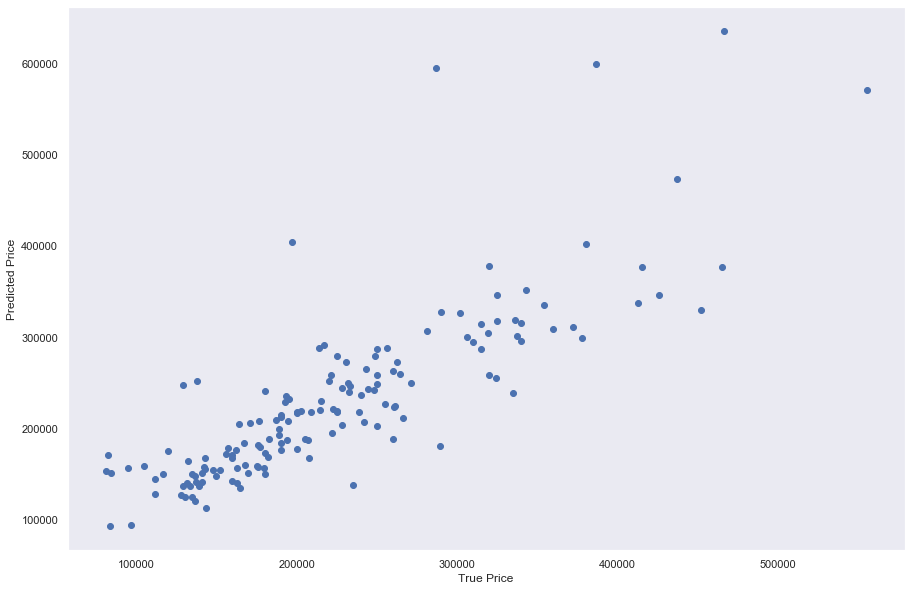


****************************************************************************************************

RESULTS - SHAPE ->  (1459, 2)


In [48]:
dataForStandard =  data.copy()
dataForStandard = dataForStandard[[
                            'LotArea',
                            'MiscVal',
                            'GrLivArea',
                            'BsmtFinSF1', 
                            'TotalBsmtSF',
                            'BsmtUnfSF',
                            '2ndFlrSF',
                            '1stFlrSF',
                            'GarageArea',
                            'MasVnrArea',
                            'BsmtFinSF2',
                            'WoodDeckSF',
                            'OpenPorchSF',
                            'EnclosedPorch',
                            'ScreenPorch',
                            'LowQualFinSF',
                            'MSSubClass',
                            'PoolArea',
                            'YearBuilt',
                            '3SsnPorch']]


elbow(dataForStandard)
dataForStandard = final_data_set(dataForStandard,4)
predictionForDataStandardDivision = clustering_and_boosting_regression(dataForStandard)
answers = create_file(predictionForDataStandardDivision,'predictions_from_standard_division_original_data.csv')

### Clustering & Prediction for Clarification C (Normalized Data)

In [49]:
print(normalCorr[:20])

Street           2907.000000
Functional       2790.000000
GarageCond       2781.400000
GarageQual       2737.800000
CentralAir       2723.000000
SaleType         2710.888889
ExterCond        2706.500000
LandContour      2702.000000
BsmtFinType2     2700.000000
Electrical       2685.600000
BsmtCond         2681.250000
PavedDrive       2672.000000
ExterQual        2462.333333
MSZoning         2317.000000
LotConfig        2230.000000
SaleCondition    2206.200000
YearBuilt        2100.681159
KitchenQual      2085.750000
Exterior2nd      1998.562500
Exterior1st      1989.866667
dtype: float64


Clustering using K-means, k = 3
****************************************************************************************************
Shapes of x and y : (636, 20) (636,) Shape of values to be predicted : (666, 20)
Fitting model on data
x_predictions is:        Street  Functional  GarageCond  GarageQual  CentralAir  SaleType  \
1460     1.0         1.0         1.0         1.0         1.0       1.0   
1462     1.0         1.0         1.0         1.0         1.0       1.0   
1466     1.0         1.0         1.0         1.0         1.0       1.0   
1467     1.0         1.0         1.0         1.0         1.0       1.0   
1471     1.0         1.0         1.0         1.0         1.0       0.0   

      ExterCond  LandContour  BsmtFinType2  Electrical  BsmtCond  PavedDrive  \
1460        1.0          1.0           0.5         1.0       1.0         1.0   
1462        1.0          1.0           1.0         1.0       1.0         1.0   
1466        0.5          1.0           1.0         1.0      

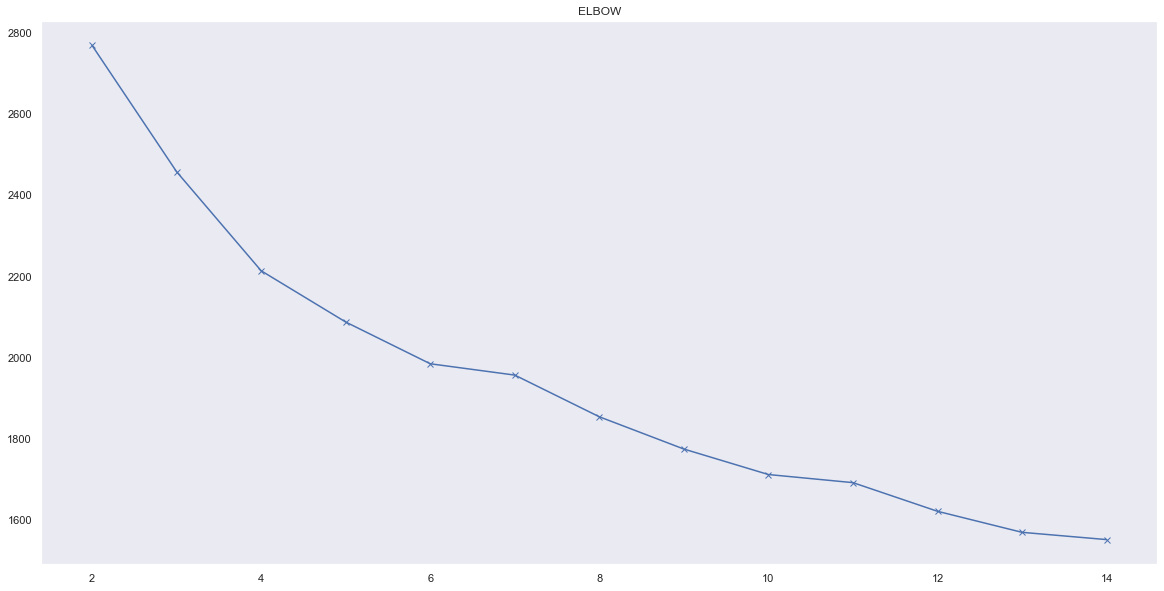

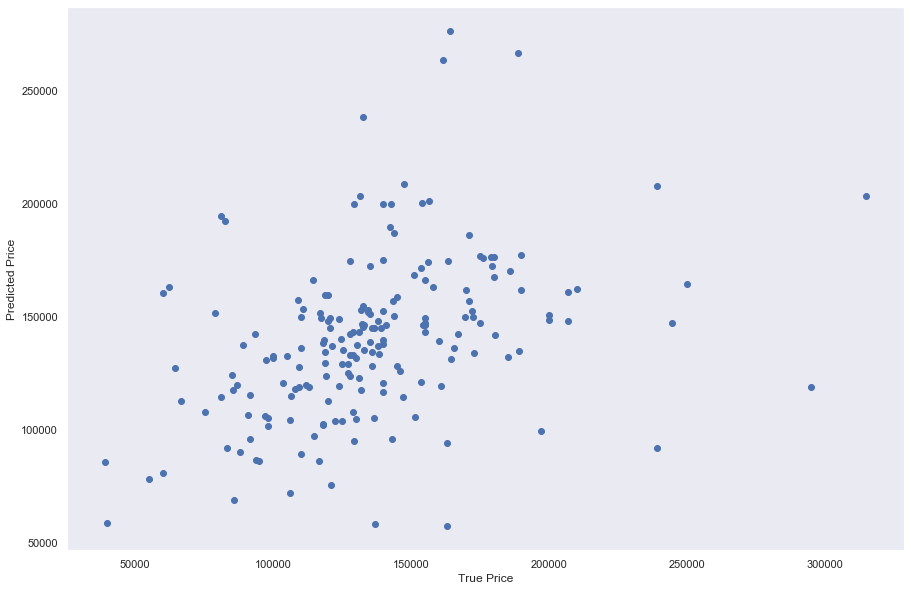


****************************************************************************************************

Shapes of x and y : (366, 20) (366,) Shape of values to be predicted : (334, 20)
Fitting model on data
x_predictions is:        Street  Functional  GarageCond  GarageQual  CentralAir  SaleType  \
1461     1.0         1.0         1.0         1.0         1.0  1.000000   
1465     1.0         1.0         1.0         1.0         1.0  1.000000   
1469     1.0         1.0         1.0         1.0         1.0  1.000000   
1473     1.0         1.0         1.0         1.0         1.0  1.000000   
1476     1.0         1.0         1.0         1.0         1.0  0.666667   

      ExterCond  LandContour  BsmtFinType2  Electrical  BsmtCond  PavedDrive  \
1461        1.0          1.0      1.000000         1.0       1.0         1.0   
1465        1.0          1.0      1.000000         1.0       1.0         1.0   
1469        1.0          1.0      0.833333         1.0       1.0         1.0   
1473      

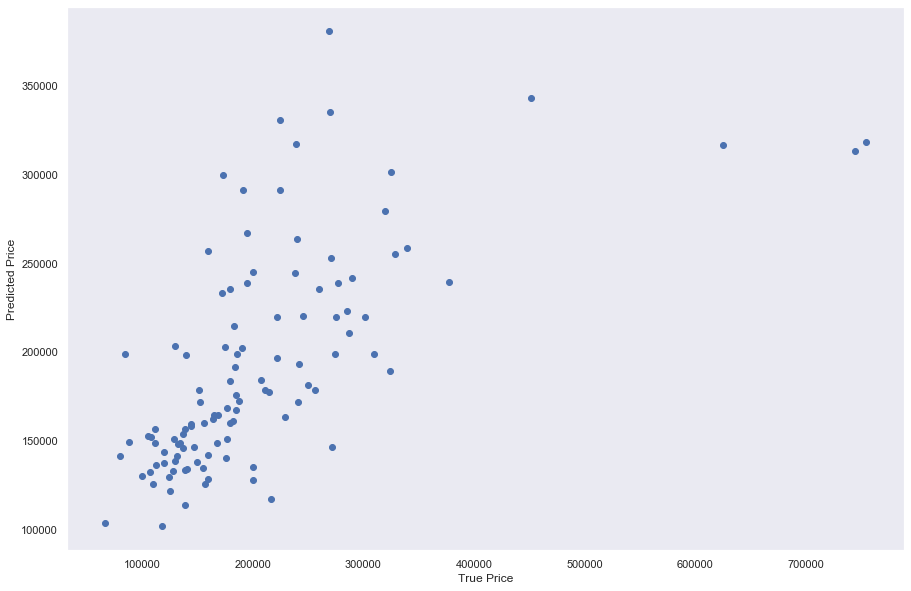


****************************************************************************************************

Shapes of x and y : (458, 20) (458,) Shape of values to be predicted : (459, 20)
Fitting model on data
x_predictions is:        Street  Functional  GarageCond  GarageQual  CentralAir  SaleType  \
1463     1.0         1.0         1.0         1.0         1.0  1.000000   
1464     1.0         1.0         1.0         1.0         1.0  1.000000   
1468     1.0         1.0         1.0         1.0         1.0  1.000000   
1470     1.0         1.0         1.0         1.0         1.0  1.000000   
1475     1.0         1.0         1.0         1.0         1.0  0.666667   

      ExterCond  LandContour  BsmtFinType2  Electrical  BsmtCond  PavedDrive  \
1463        1.0     1.000000      1.000000         1.0       1.0         1.0   
1464        1.0     0.333333      1.000000         1.0       1.0         1.0   
1468        1.0     1.000000      1.000000         1.0       1.0         1.0   
1470      

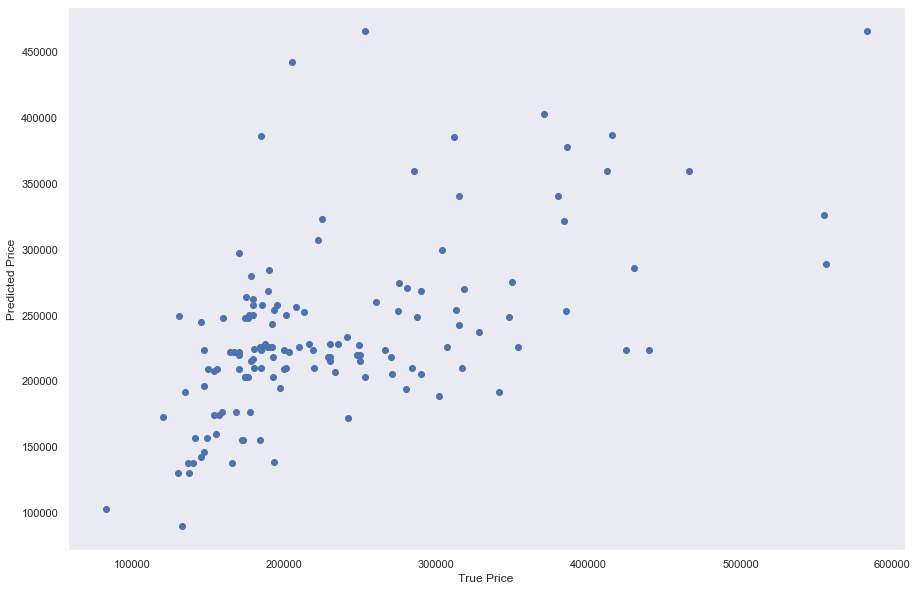


****************************************************************************************************

RESULTS - SHAPE ->  (1459, 2)


In [50]:
dataNormalizedFromCorr = data_normalized.copy()
dataNormalizedFromCorr = dataNormalizedFromCorr[[
                            'Street',
                            'Functional',
                            'GarageCond',
                            'GarageQual', 
                            'CentralAir',
                            'SaleType',
                            'ExterCond',
                            'LandContour',
                            'BsmtFinType2',
                            'Electrical',
                            'BsmtCond',
                            'PavedDrive',
                            'ExterQual',
                            'MSZoning',
                            'LotConfig',
                            'SaleCondition',
                            'YearBuilt',
                            'KitchenQual',
                            'Exterior2nd',
                            'Exterior1st']]


elbow(dataNormalizedFromCorr)
dataNormalizedFromCorr = final_data_set(dataNormalizedFromCorr,3)
predictionForNormalizedDataCorr = clustering_and_boosting_regression(dataNormalizedFromCorr)
answers = create_file(predictionForNormalizedDataCorr,'predictions_from_corr_normalized_data.csv')

### Clustering & Prediction for Clarification D (Normalized Data)

In [51]:
print(normalizedStd[:20])

LotShape        0.469907
HeatingQC       0.435637
LotConfig       0.401118
GarageFinish    0.400805
BsmtFinType1    0.372529
YearRemodAdd    0.348239
YrSold          0.328741
BsmtQual        0.324066
GarageType      0.322136
KitchenQual     0.317596
BldgType        0.301628
BsmtExposure    0.287792
HouseStyle      0.273277
PavedDrive      0.268649
Electrical      0.264677
HalfBath        0.251436
CentralAir      0.250318
MSSubClass      0.250104
Exterior2nd     0.249453
Neighborhood    0.248250
dtype: float64


Clustering using K-means, k = 3
****************************************************************************************************
Shapes of x and y : (627, 20) (627,) Shape of values to be predicted : (649, 20)
Fitting model on data
x_predictions is:        LotShape  HeatingQC  LotConfig  GarageFinish  BsmtFinType1  \
1460       1.0        1.0        1.0           1.0      0.833333   
1469       1.0        1.0        0.0           0.0      0.000000   
1471       1.0        1.0        1.0           1.0      0.833333   
1472       1.0        1.0        1.0           1.0      0.833333   
1473       1.0        1.0        0.5           1.0      0.000000   

      YearRemodAdd  YrSold  BsmtQual  GarageType  KitchenQual  BldgType  \
1460      0.183333     1.0       1.0    0.166667          1.0      0.00   
1469      0.333333     1.0       1.0    0.166667          1.0      0.00   
1471      0.350000     1.0       1.0    0.833333          1.0      0.75   
1472      0.350000     1.0       1.0

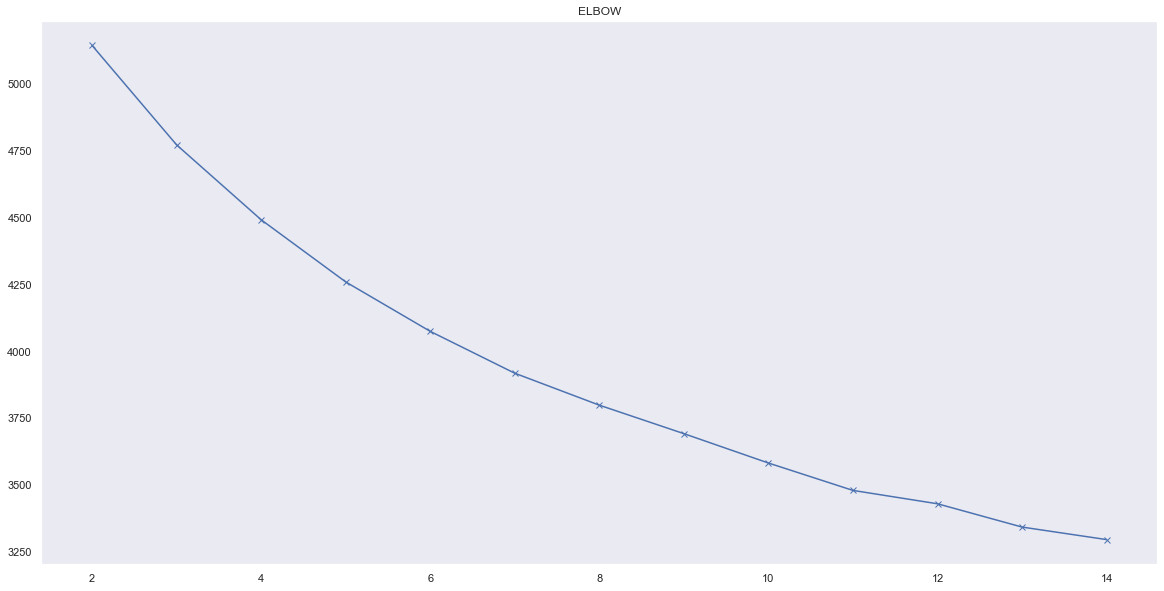

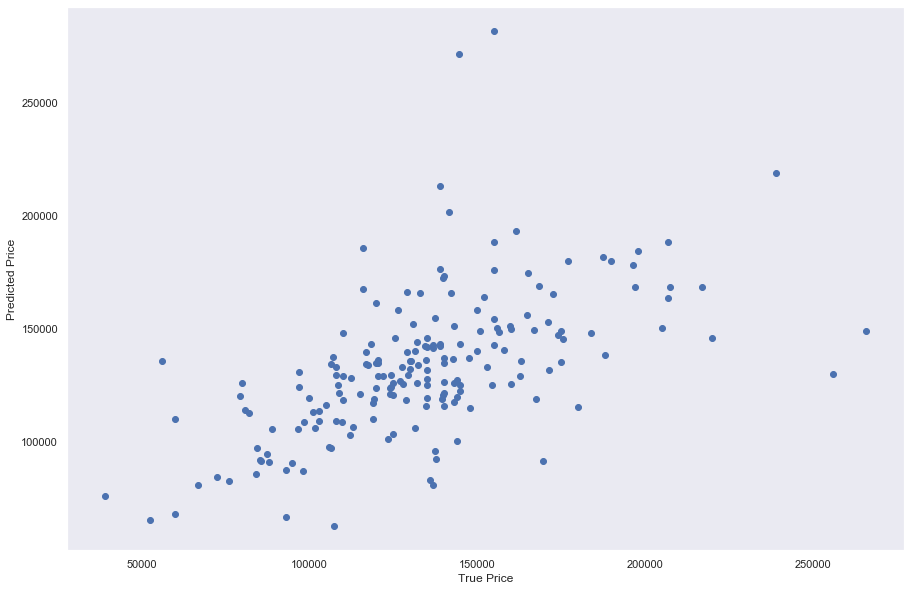


****************************************************************************************************

Shapes of x and y : (421, 20) (421,) Shape of values to be predicted : (431, 20)
Fitting model on data
x_predictions is:        LotShape  HeatingQC  LotConfig  GarageFinish  BsmtFinType1  \
1461       0.0        1.0        0.0      1.000000      0.000000   
1462       0.0        0.5        1.0      0.000000      0.333333   
1463       0.0        0.0        1.0      0.000000      0.333333   
1464       0.0        0.0        1.0      0.666667      0.000000   
1465       0.0        0.5        0.0      0.000000      1.000000   

      YearRemodAdd  YrSold  BsmtQual  GarageType  KitchenQual  BldgType  \
1461      0.133333     1.0       1.0    0.166667          0.5       0.0   
1462      0.800000     1.0       0.5    0.166667          1.0       0.0   
1463      0.800000     1.0       1.0    0.166667          0.5       0.0   
1464      0.700000     1.0       0.5    0.166667          0.5     

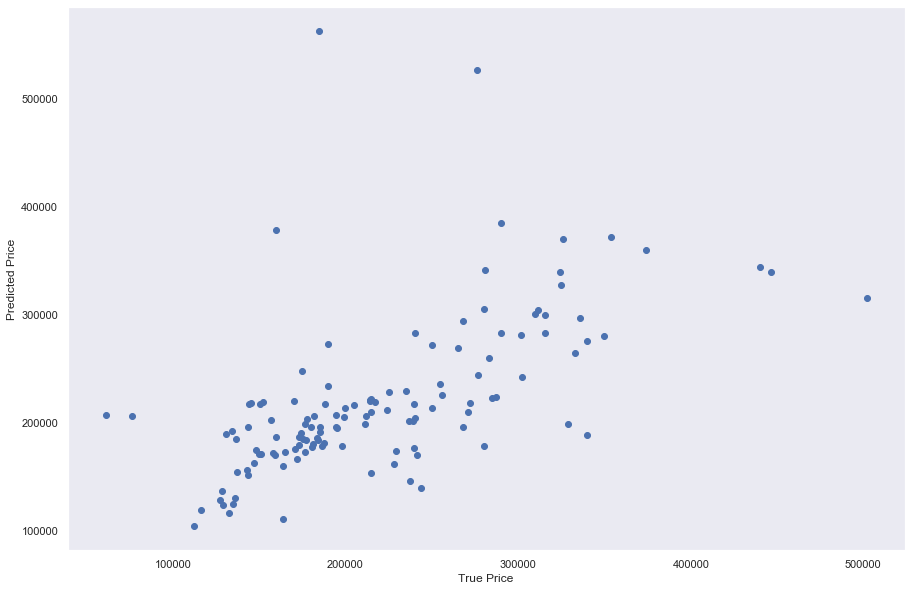


****************************************************************************************************

Shapes of x and y : (412, 20) (412,) Shape of values to be predicted : (379, 20)
Fitting model on data
x_predictions is:        LotShape  HeatingQC  LotConfig  GarageFinish  BsmtFinType1  \
1468       1.0        0.5        1.0           1.0      0.333333   
1474       1.0        0.0        0.5           1.0      1.000000   
1477       1.0        0.0        1.0           0.0      0.333333   
1479       1.0        0.0        1.0           0.0      0.333333   
1480       1.0        0.0        0.0           0.0      0.333333   

      YearRemodAdd  YrSold  BsmtQual  GarageType  KitchenQual  BldgType  \
1468      0.666667     1.0       0.5    0.166667          0.5      0.00   
1474      0.416667     1.0       0.5    0.166667          1.0      0.75   
1477      0.916667     1.0       0.0    0.166667          0.0      0.00   
1479      0.900000     1.0       0.0    0.166667          0.0     

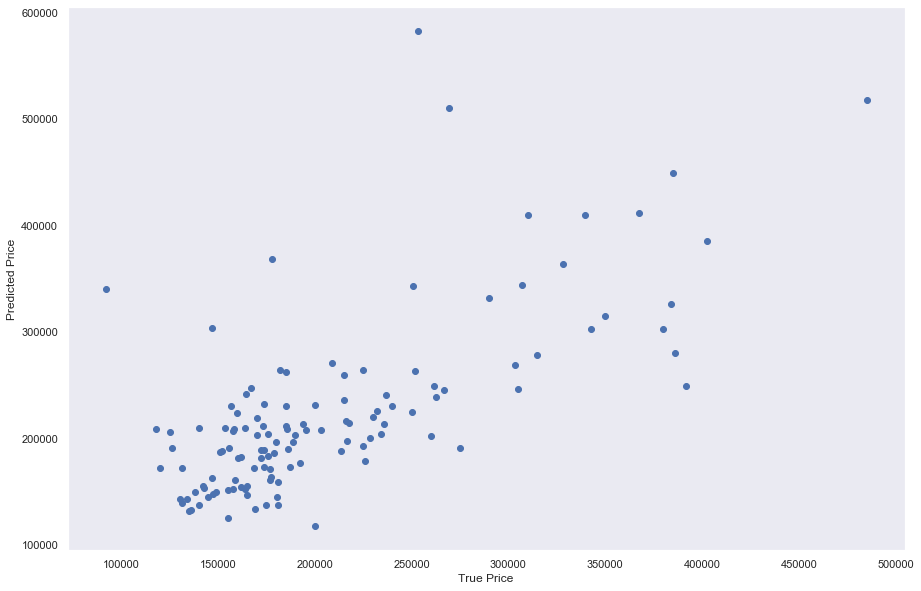


****************************************************************************************************

RESULTS - SHAPE ->  (1459, 2)


In [52]:
dataNormalizedFromStandardDiviation = data_normalized.copy()
dataNormalizedFromStandardDiviation = dataNormalizedFromStandardDiviation[[
                            'LotShape',
                            'HeatingQC',
                            'LotConfig',
                            'GarageFinish', 
                            'BsmtFinType1',
                            'YearRemodAdd',
                            'YrSold',
                            'BsmtQual',
                            'GarageType',
                            'KitchenQual',
                            'BldgType',
                            'HouseStyle',
                            'BsmtExposure',
                            'PavedDrive',
                            'Electrical',
                            'HalfBath',
                            'CentralAir',
                            'MSSubClass',
                            'Exterior2nd',
                            'Neighborhood']]


elbow(dataNormalizedFromStandardDiviation)
dataNormalizedFromStandardDiviation = final_data_set(dataNormalizedFromStandardDiviation,3)
predictionForNormalizedDataStandardDiviation = clustering_and_boosting_regression(dataNormalizedFromStandardDiviation)
answers = create_file(predictionForNormalizedDataStandardDiviation,'predictions_from_standard_division_normalized_data.csv')